Improving image resolution using Autoencoders. enhancing the resolution of low resolution images (e.g. 64 x 64 pixels) to higher resolution images (e.g. 256 x 256 pixels) using an autoencoder.

In [ ]:
# Importing Libraries
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout

In [ ]:
# Loading the train and test datasets
train_folder = '/content/drive/MyDrive/data/train'
test_folder = '/content/drive/MyDrive/data/test'

# Setting variables
image_size = 256
resize_factor = 0.25

# Function to load and resize images
def load_and_resize_images(folder, size, resize_factor):
    images = []
    small_images = []
    # Defining the image extension for files to process
    valid_extension = '.jpeg'

    for filename in os.listdir(folder):
        # Checking the file extension before processing
        if os.path.splitext(filename)[1].lower() == valid_extension:
            img_path = os.path.join(folder, filename)
            with Image.open(img_path) as img:
                img = img.resize((size, size))
                images.append(np.array(img))
                new_size = int(size * resize_factor)
                small_image = img.resize((new_size, new_size))
                small_images.append(np.array(small_image))
    return np.array(images), np.array(small_images)

train_images, train_images_small = load_and_resize_images(train_folder, image_size, resize_factor)
test_images, test_images_small = load_and_resize_images(test_folder, image_size, resize_factor)

# Assigning the train and test datasets
x_train = train_images.astype('float32') / 255.0
x_test = test_images.astype('float32') / 255.0

# Assigning the train and test datasets for small images
x_train_small = train_images_small.astype('float32') / 255.0
x_test_small = test_images_small.astype('float32') / 255.0

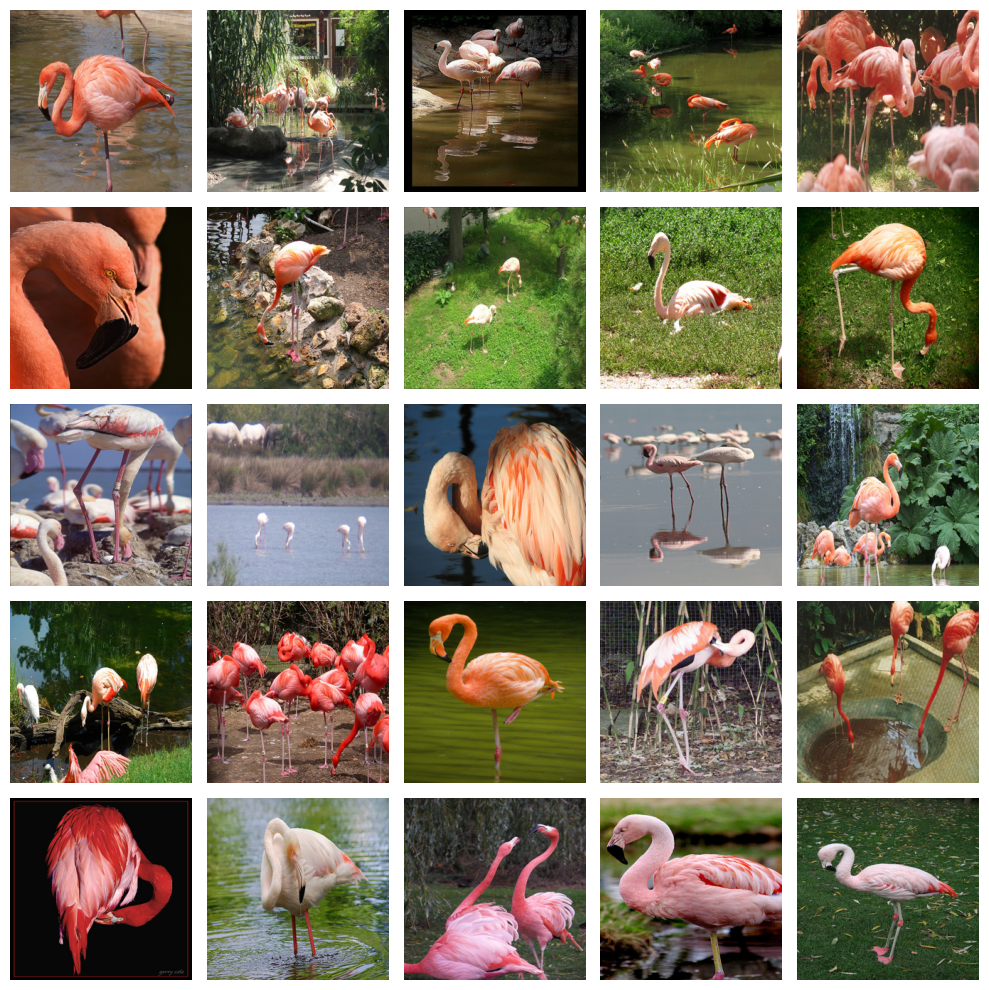

In [ ]:
# Function to visualize 25 images in a grid
def visualize_images(image_array, num_images=25, num_columns=5):
    num_rows = num_images // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10))
    axes = axes.flatten()

    for i in range(num_images):
        img = image_array[i]
        axes[i].imshow(img.astype('uint8'))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Calling the function to visualize the first 25 images from the training set
visualize_images(train_images)

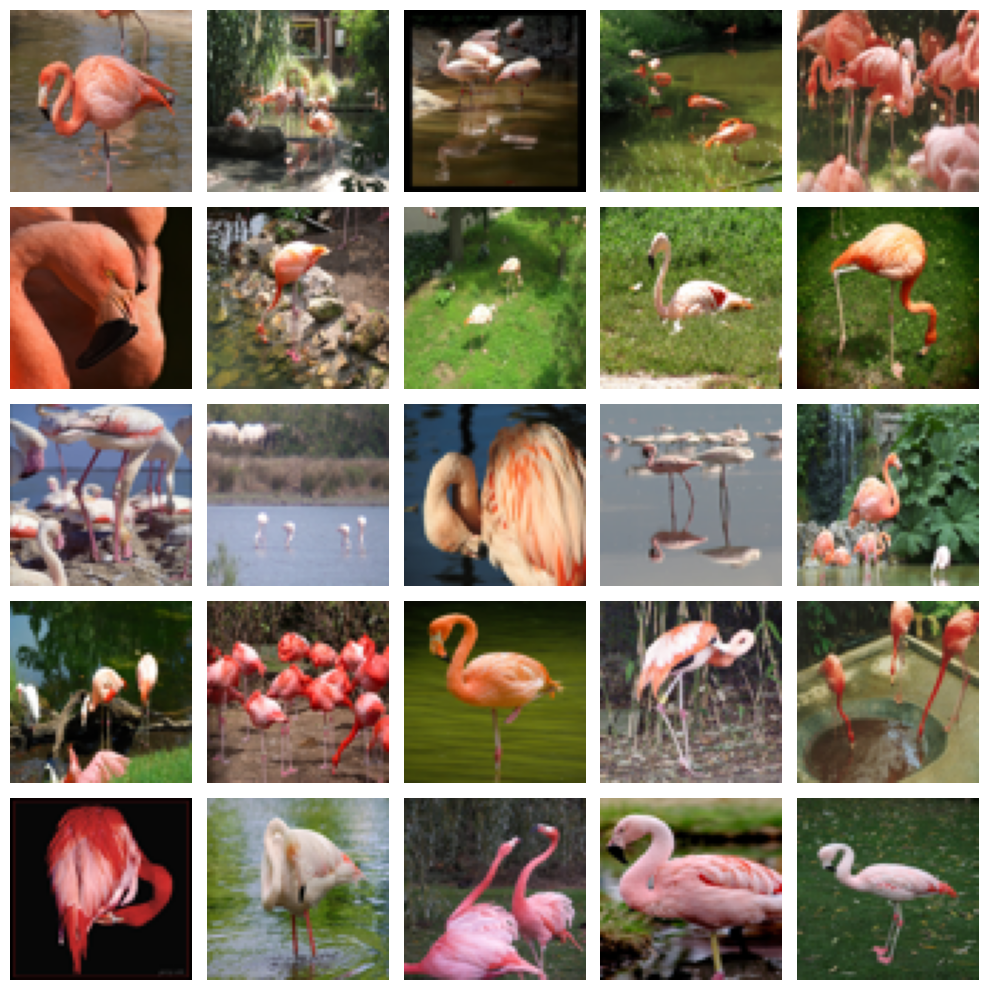

In [ ]:
# Calling the function to visualize the first 25 small images from the training set
visualize_images(train_images_small, num_images=25, num_columns=5)

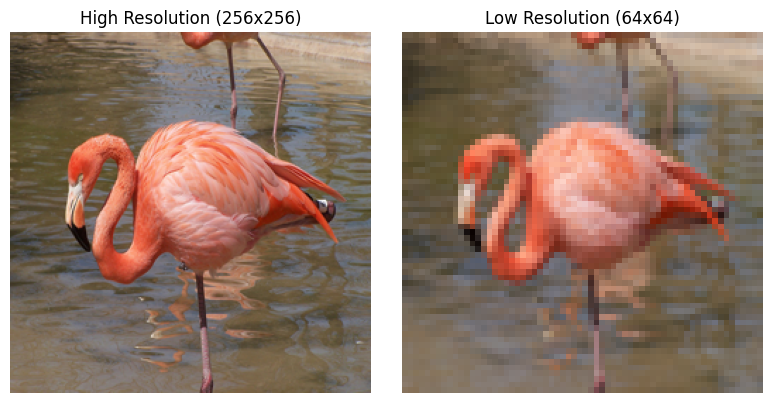

In [ ]:
# Function to visualize one high-resolution and its corresponding low-resolution image side by side
def visualize_image_pair(high_res_image, low_res_image):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Showing the high-resolution image
    axes[0].imshow(high_res_image.astype('uint8'))
    axes[0].set_title('High Resolution (256x256)')
    axes[0].axis('off')

    # Showing the low-resolution image
    axes[1].imshow(low_res_image.astype('uint8'))
    axes[1].set_title('Low Resolution (64x64)')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the first image in the dataset using function above
visualize_image_pair(train_images[0], train_images_small[0])

In [ ]:
# Defining the input shape
input_shape = (64, 64, 3)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)

outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder Model
autoencoder = Model(inputs, outputs)

In [ ]:
# Compiling the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Training the model
history = autoencoder.fit(x_train_small, x_train, epochs=50, batch_size=64,
                          validation_data=(x_test_small, x_test))

Epoch 1/50
21/21 [==============================] - 21s 411ms/step - loss: 0.0641 - val_loss: 0.0435
Epoch 2/50
21/21 [==============================] - 4s 188ms/step - loss: 0.0352 - val_loss: 0.0250
Epoch 3/50
21/21 [==============================] - 4s 202ms/step - loss: 0.0237 - val_loss: 0.0274
Epoch 4/50
21/21 [==============================] - 4s 191ms/step - loss: 0.0201 - val_loss: 0.0227
Epoch 5/50
21/21 [==============================] - 4s 188ms/step - loss: 0.0184 - val_loss: 0.0217
Epoch 6/50
21/21 [==============================] - 4s 193ms/step - loss: 0.0172 - val_loss: 0.0210
Epoch 7/50
21/21 [==============================] - 4s 200ms/step - loss: 0.0165 - val_loss: 0.0203
Epoch 8/50
21/21 [==============================] - 4s 193ms/step - loss: 0.0158 - val_loss: 0.0179
Epoch 9/50
21/21 [==============================] - 4s 205ms/step - loss: 0.0153 - val_loss: 0.0166
Epoch 10/50
21/21 [==============================] - 4s 214ms/step - loss: 0.0150 - val_loss: 0.016

1/1 [==============================] - 1s 525ms/step


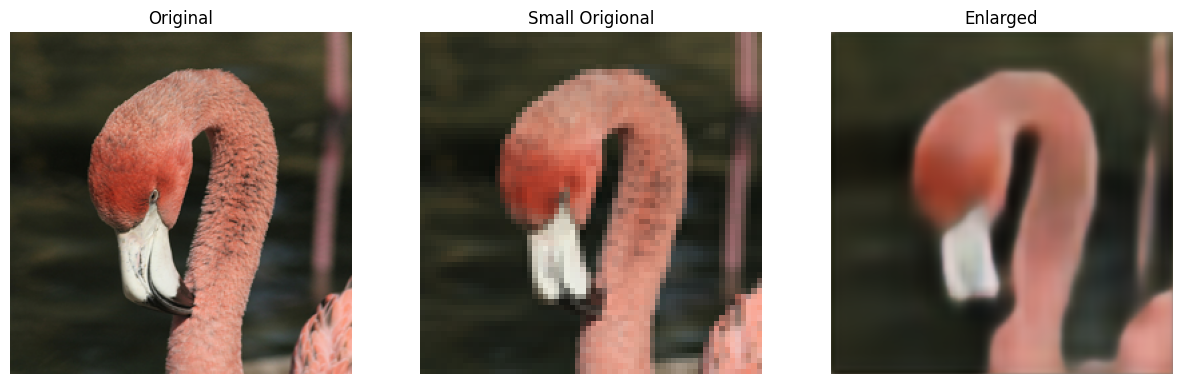

In [ ]:
# Enhancing the resolution of the first low-resolution test image
test_image_small = x_test_small[0]
test_image_small = np.expand_dims(test_image_small, axis=0)
enhanced_image = autoencoder.predict(test_image_small)

# Function to visualize images
def compare_images(original, small, enhanced):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(original)
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(small.squeeze(), cmap='gray')
    axes[1].set_title('Small Origional')
    axes[1].axis('off')

    axes[2].imshow(enhanced.squeeze(), cmap='gray')
    axes[2].set_title('Enlarged')
    axes[2].axis('off')

    plt.show()

# Visualizing the original, small, and enhanced images side by side
compare_images(x_test[0], x_test_small[0], enhanced_image)